<a href="https://colab.research.google.com/github/anshulsinghkamboj-ml/nlp-/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 39.7 MB/s eta 0:00:00


In [ ]:
sentences = [
    "king queen man woman royal throne crown prince princess".split(),
    "paris france rome italy capital city europe".split(),
    "car bus train vehicle transport travel road".split(),
    "dog cat animal pet tail bark meow".split(),
]

# Make the corpus a list of lists of tokens
corpus = sentences

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(
    corpus,
    vector_size=50,
    window=3,
    min_count=1,
    workers=4,
    sg=1   # 1 = skip-gram
)

In [ ]:
print(model.wv.most_similar("king"))

[('paris', 0.268388032913208), ('vehicle', 0.25767481327056885), ('prince', 0.24693012237548828), ('pet', 0.20338234305381775), ('royal', 0.15372078120708466), ('queen', 0.1454065442085266), ('meow', 0.1449134349822998), ('man', 0.13455919921398163), ('dog', 0.0730602815747261), ('road', 0.06872570514678955)]


In [ ]:
print(model.wv.most_similar(positive=["king", "woman"], negative=["man"]))

[('vehicle', 0.35802507400512695), ('travel', 0.2641952633857727), ('europe', 0.1773974448442459), ('paris', 0.17623372375965118), ('queen', 0.14835774898529053), ('italy', 0.14747317135334015), ('france', 0.11536124348640442), ('tail', 0.07464779913425446), ('meow', 0.07198800891637802), ('city', 0.056981705129146576)]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
words = list(model.wv.key_to_index.keys())
vectors = model.wv[words]
vectors

array([[-0.0010745 ,  0.00047539,  0.01021089, ...,  0.01922338,
         0.009966  ,  0.01846464],
       [-0.01631047,  0.0089949 , -0.00826659, ..., -0.01408541,
         0.0018078 ,  0.01278862],
       [-0.01724787,  0.00733028,  0.01037782, ..., -0.00309325,
         0.00301963,  0.0035796 ],
       ...,
       [-0.00023947,  0.00176213, -0.01419298, ..., -0.00627375,
        -0.01268086,  0.01974452],
       [ 0.01539329,  0.01824128,  0.002271  , ..., -0.00437107,
         0.00174625,  0.00847241],
       [ 0.00660866,  0.01019165,  0.00917297, ...,  0.0165366 ,
        -0.0121971 ,  0.01887656]], dtype=float32)

In [ ]:
pca=PCA(n_components=2)
points = pca.fit_transform(vectors)

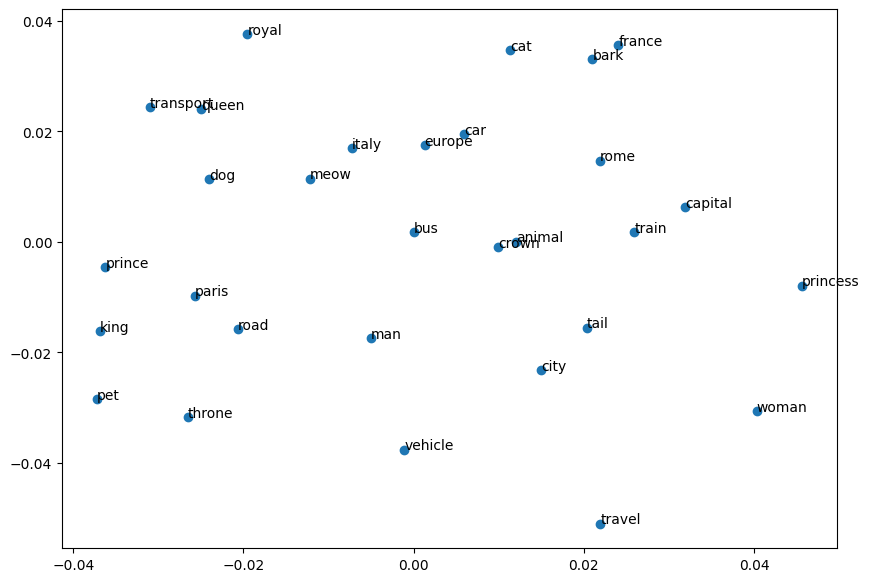

In [ ]:

plt.figure(figsize=(10,7))
plt.scatter(points[:,0], points[:,1])
for word, (x,y) in zip(words, points):
    plt.annotate(word, (x,y))
plt.show()

In [ ]:
from gensim.models import Word2Vec

# tiny training corpus
sentences = [
    ["the", "king", "rules", "the", "kingdom"],
    ["the", "queen", "rules", "the", "country"],
    ["the", "man", "is", "strong"],
    ["the", "woman", "is", "wise"],
    ["the", "prince", "is", "young"],
    ["the", "princess", "is", "young"]
]

# CBOW model (sg=0)
cbow_model = Word2Vec(
    sentences,
    vector_size=50,
    window=3,
    min_count=1,
    sg=0   # CBOW
)

# Skip-Gram model (sg=1)
skip_model = Word2Vec(
    sentences,
    vector_size=50,
    window=3,
    min_count=1,
    sg=1   # Skip-Gram
)

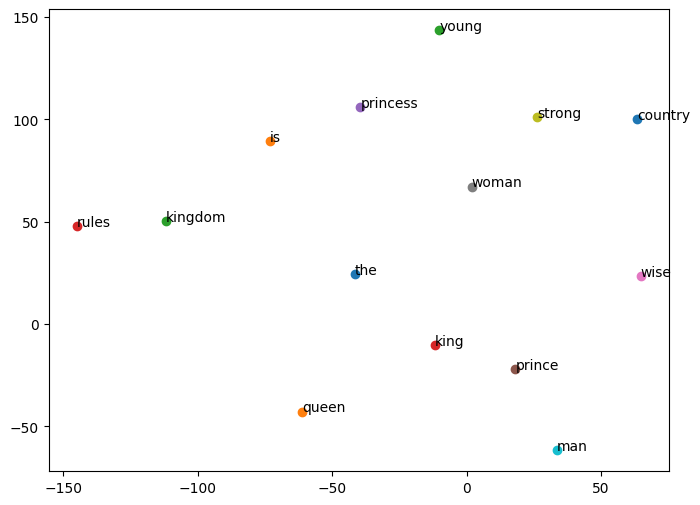

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = list(skip_model.wv.index_to_key)
vectors = skip_model.wv[words]

tsne = TSNE(n_components=2, perplexity=5, random_state=0)
reduced = tsne.fit_transform(vectors)

plt.figure(figsize=(8,6))
for i, word in enumerate(words):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x+0.02, y+0.02, word)
plt.show()
